In [12]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

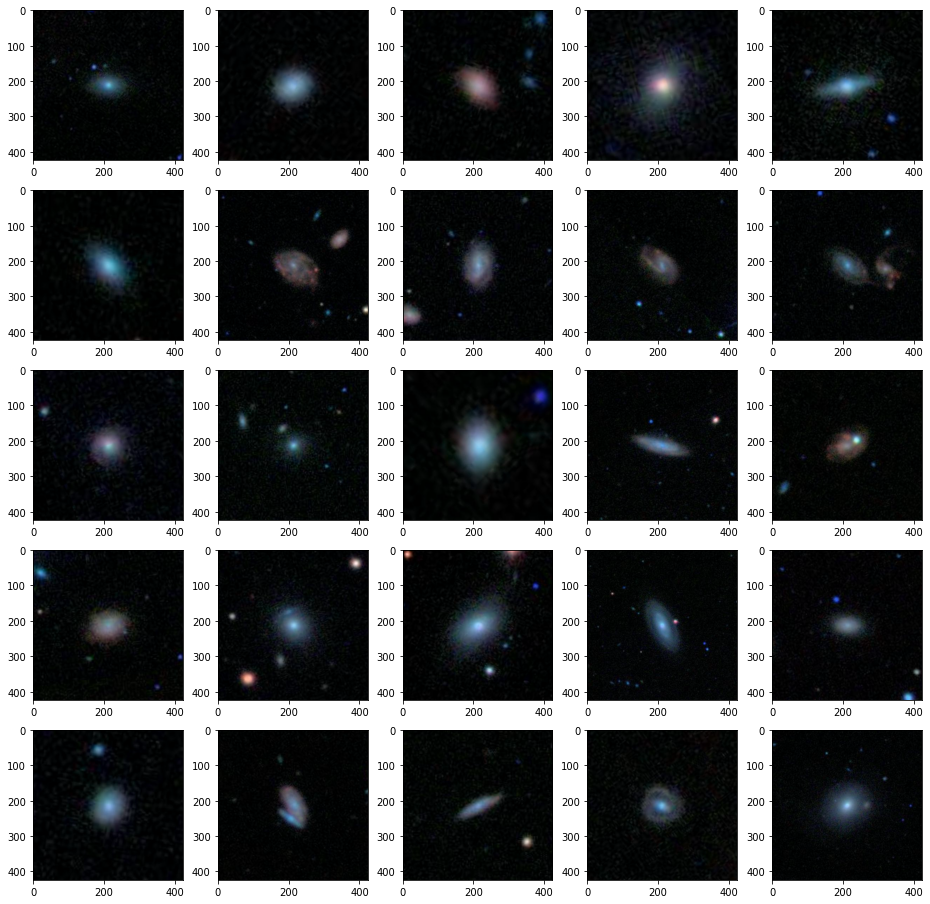

In [16]:
local_path = "images_training_rev1/"

file_lst = glob.glob(local_path+"*.jpg")
N = len(file_lst)
selected = np.random.choice(N, 25)

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    img = cv2.imread(file_lst[selected[i]])
    plt.imshow(img)

In [14]:
df = pd.read_csv("training_solutions_rev1.csv", usecols=[0,1,2,3])

In [17]:
df.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161


In [18]:
len(df)

61578

In [19]:
df_rounds = df[(df['Class1.1'] > df['Class1.2']) & (df['Class1.1'] > df['Class1.3'])]
df_disks =  df[(df['Class1.2'] > df['Class1.1']) & (df['Class1.2'] > df['Class1.3'])]
df_star =  df[(df['Class1.3'] > df['Class1.1']) & (df['Class1.3'] > df['Class1.2'])]

In [20]:
df_rounds.shape

(26679, 4)

In [21]:
df_disks.shape


(34826, 4)

In [22]:
df_star.shape

(59, 4)

In [23]:
df_rounds.head(2)

,GalaxyID,Class1.1,Class1.2,Class1.3
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059


In [24]:
df_rounds = df_rounds.drop(columns=['Class1.1','Class1.2','Class1.3'])


In [25]:
df_rounds['type'] = '1'
df_rounds.head(2)

,GalaxyID,type
2,100053,1
3,100078,1


In [26]:
df_disks = df_disks.drop(columns=['Class1.1','Class1.2','Class1.3'])

In [27]:
df_disks['type'] = '2'
df_disks.head(2)

,GalaxyID,type
0,100008,2
1,100023,2


In [28]:
df_star = df_star.drop(columns=['Class1.1','Class1.2','Class1.3'])

In [29]:
df_star['type'] = '3'
df_star.head(2)

,GalaxyID,type
1791,126783,3
2376,135453,3


In [30]:
dataClass = pd.concat([df_rounds,df_disks,df_star])
dataClass.head(2)

,GalaxyID,type
2,100053,1
3,100078,1


In [31]:
dataClass2 = dataClass.copy()

In [32]:
dataClass2 =dataClass2.set_index('GalaxyID')
dataClass2.head(2)

,type
GalaxyID,
100053,1
100078,1


In [33]:
dataClass2.to_pickle("dataClass2.pkl")

In [34]:
dataClass2 = pd.read_pickle("dataClass2.pkl")

In [35]:
N = len(df_disks)
selected = np.random.choice(N, 25)
selected_idx = df_disks.GalaxyID.values[selected]
selected_idx

array([925934, 661165, 535376, 249747, 917907, 354333, 651234, 693254,
       335775, 977486, 964118, 229427, 834363, 443988, 684966, 819906,
       467154, 685942, 322307, 701076, 264515, 911091, 717374, 839835,
       822119])

In [36]:
local_path +str(df_disks.GalaxyID.values[0])+".jpg"

'images_training_rev1/100008.jpg'

images_training_rev1/100053.jpg
images_training_rev1/100078.jpg
images_training_rev1/100090.jpg
images_training_rev1/100122.jpg
images_training_rev1/100123.jpg
images_training_rev1/100128.jpg
images_training_rev1/100288.jpg
images_training_rev1/100295.jpg
images_training_rev1/100402.jpg


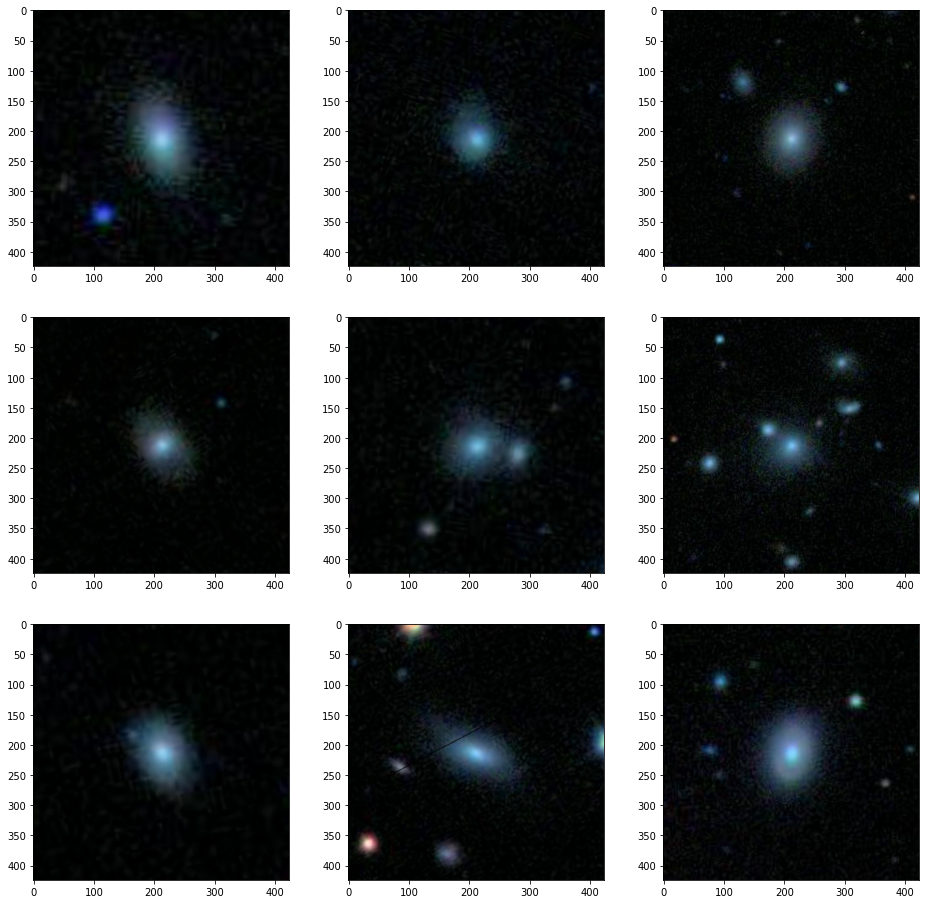

In [37]:
import cv2
local_path = "images_training_rev1/"
plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
   # filename = local_path + str(selected_idx[i]) + ".jpg"
    img = cv2.imread(local_path +str(df_rounds.GalaxyID.values[i])+".jpg",-1)
    print(local_path +str(df_rounds.GalaxyID.values[i])+".jpg")
    plt.imshow(img)

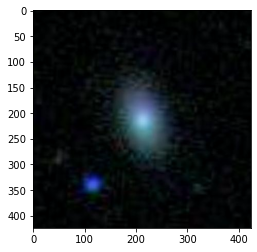

In [38]:
img = cv2.imread(local_path +str(df_rounds.GalaxyID.values[0])+".jpg",)
plt.imshow(img)

images_training_rev1/100008.jpg
(200, 200)
images_training_rev1/100023.jpg
(200, 200)
images_training_rev1/100053.jpg
(200, 200)
images_training_rev1/100078.jpg
(200, 200)
images_training_rev1/100090.jpg
(200, 200)
images_training_rev1/100122.jpg
(200, 200)
images_training_rev1/100123.jpg
(200, 200)
images_training_rev1/100128.jpg
(200, 200)
images_training_rev1/100134.jpg
(200, 200)


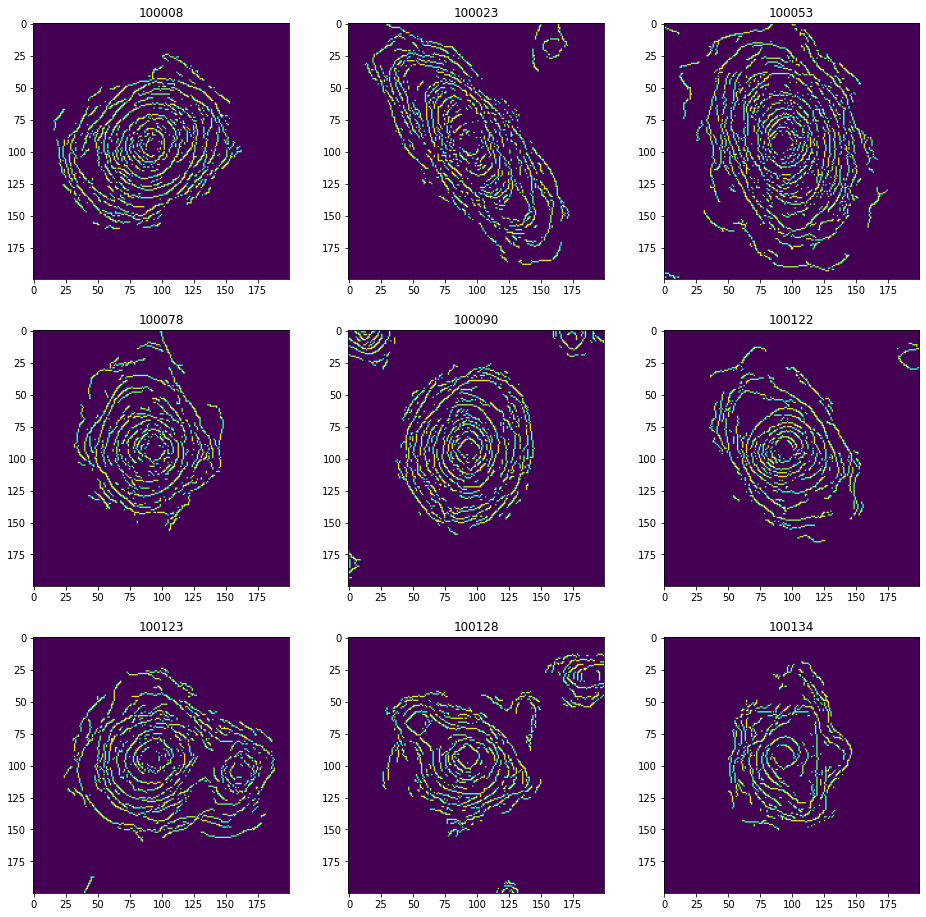

In [15]:
local_path = "images_training_rev1/"
file_lst = glob.glob(local_path+"*.jpg")

N = len(file_lst)
#selected = np.random.choice(N, 25)

df_clean3 = []
idGal = []
plt.figure(figsize=(16,16))
for pictures in range(9) :
    plt.subplot(3,3,pictures+1)
    reader = cv2.imread(file_lst[pictures])
    reader = cv2.imread(local_path +str(df.GalaxyID.values[pictures])+".jpg")
    reader = cv2.cvtColor(reader, cv2.COLOR_BGR2RGB)
    reader = reader[120:320, 120:320]
    reader = cv2.medianBlur(reader, 21)
    reader = cv2.Canny(reader,10,20) 
    print(local_path +str(df.GalaxyID.values[pictures])+".jpg")
    plt.imshow(reader)
    print(reader.shape)
    plt.title(str(df.GalaxyID.values[pictures]))
    idGalaxy = str(df.GalaxyID.values[pictures])
    df_clean3.append(reader)
    idGal.append(idGalaxy)

In [ ]:
local_path = "images_training_rev1/"
file_lst = glob.glob(local_path+"*.jpg")


df_clean3 = []
idGal = []
#plt.figure(figsize=(16,16))
for pictures in range(61578) :
   # plt.subplot(3,3,pictures+1)
    #reader = cv2.imread(file_lst[pictures])
    reader = cv2.imread(local_path +str(df.GalaxyID.values[pictures])+".jpg")
    reader = cv2.cvtColor(reader, cv2.COLOR_BGR2RGB)
    reader = reader[120:320, 120:320]
    reader = cv2.medianBlur(reader, 21)
    reader = cv2.Canny(reader,10,20) 
    #print(local_path +str(df.GalaxyID.values[pictures])+".jpg")
    #plt.imshow(reader)
   # print(reader.shape)
   # plt.title(str(df.GalaxyID.values[pictures]))
    
    idGalaxy = str(df.GalaxyID.values[pictures])
    df_clean3.append(reader)
    idGal.append(idGalaxy)

In [ ]:
df_clean3=np.asarray(df_clean3)

In [ ]:


df_clean3 = df_clean3.reshape(61578,-1)

In [ ]:
type(df_clean3)


In [ ]:
dfDeArray = pd.DataFrame(df_clean3)
dfDeArray['GalaxyID'] = idGal
#dfDeArray

In [ ]:
dfDeArray2 = dfDeArray.copy()

In [ ]:
dfDeArray2.GalaxyID = dfDeArray2.GalaxyID.astype(int)
dfDeArray2 =dfDeArray2.set_index('GalaxyID')
#dfDeArray2

In [ ]:
#dfDeArray2.to_pickle("dfDeArray2.pkl")

In [ ]:
#dfDeArray2 = pd.read_pickle("dfDeArray2.pkl")

In [ ]:
#dataClass2 = pd.read_pickle("dataClass2.pkl")

In [ ]:
dataPrep = dfDeArray2.join(dataClass2)
#dataPrep

In [ ]:
#dataPrep.to_pickle("dataPrep.pkl")

In [39]:
dataPrep = pd.read_pickle("dataPrep.pkl")

In [40]:

dataPrep =dataPrep.dropna()

In [41]:
dataPrep

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,type
GalaxyID,,,,,,,,,,,,,,,,,,,,,
100008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
100023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
100053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100090,0,0,255,0,0,255,0,0,255,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Dead Kernel almost every time, so I had to reduce quantity of pictures max 8000

https://twitter.com/icaromedeiros/status/740920706184187905/photo/1


In [4]:
dataPrep = dataPrep.head(8000)


In [5]:


from sklearn.model_selection import train_test_split
X = dataPrep.drop('type',axis=1)
y = dataPrep['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



In [ ]:
#np.save('X_train',X_train)

In [ ]:
#y_train.to_pickle("y_train.pkl")

In [ ]:
#np.save('X_test',X_test)

In [ ]:
#y_test.to_pickle("y_test.pkl")

In [ ]:
y_train = pd.read_pickle("y_train.pkl")

In [ ]:
y_test = pd.read_pickle("y_test.pkl")

In [ ]:
X_train = np.load('X_train.npy')

In [ ]:
X_test= np.load('X_test.npy')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(90)

In [ ]:
pca.fit(X_train)

In [ ]:
X_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

In [7]:
# Instanciation et entraînement du modèle
from sklearn.linear_model import LogisticRegression

In [8]:
reglog = LogisticRegression(solver='liblinear')

In [9]:
reglog.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [10]:
# Prédictions sur le test set
y_pred = reglog.predict(X_test)



In [11]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.564


The score is not interesting because I could do the test only with 8000 pictures

In [ ]:
dfskuska1.shape

In [ ]:
dfskuska1.head()

In [ ]:
print(dfskuska1.image.iloc[:5])

In [ ]:
dfskuska1['image']

In [43]:
len(file_lst)

61578

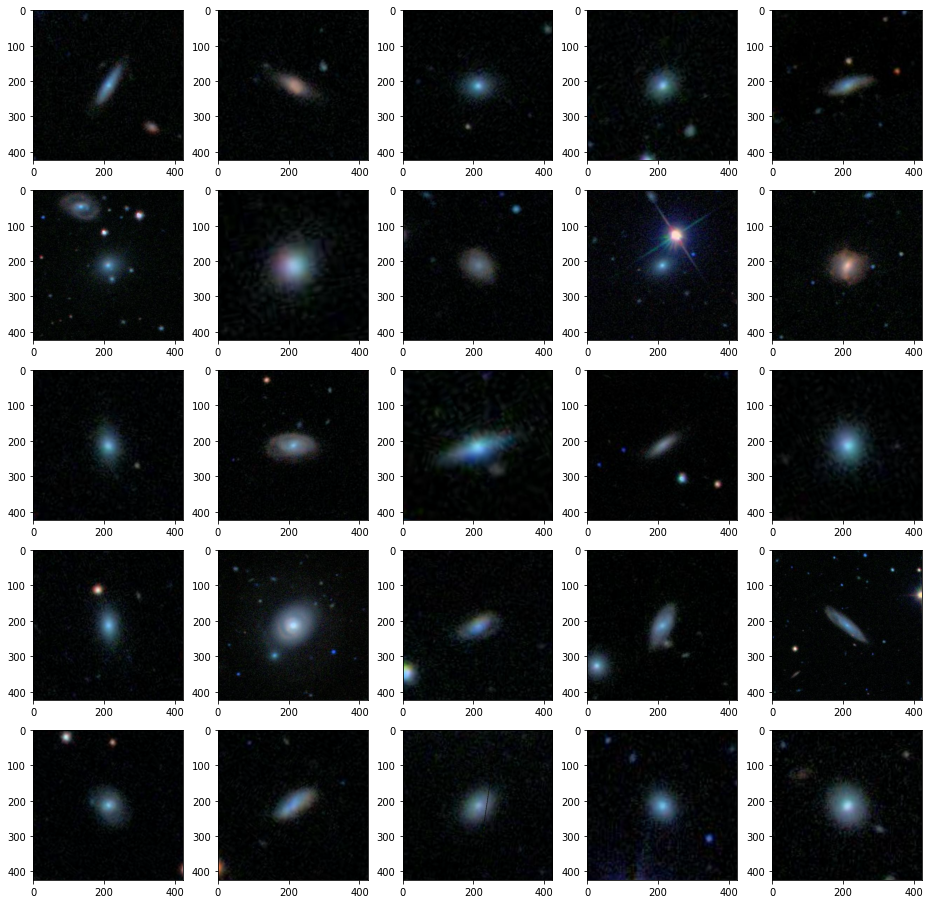

In [42]:
local_path = "images_training_rev1/"

file_lst = glob.glob(local_path+"*.jpg")
N = len(file_lst)
selected = np.random.choice(N, 25)

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    img = cv2.imread(file_lst[selected[i]])
    plt.imshow(img)